#**CUSTOMER_SUPPORT_TICKET_ANALYSIS**

In [1]:
# For data manipulation and numerical operation
import pandas as pd
import numpy as np

# importing datetime for handling date and time conversions
from datetime import datetime

# For Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns

# importing warnings to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

# For text processing
import re
import string
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer


#For Text Visualization
from wordcloud import WordCloud


In [2]:

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
df = pd.read_csv("/content/customer_support_tickets.csv")

In [4]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [5]:
print("Shape of the dataset =", df.shape)

Shape of the dataset = (8469, 17)


In [6]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [7]:
df.loc[0]

,0
Ticket ID,1
Customer Name,Marisa Obrien
Customer Email,carrollallison@example.com
Customer Age,32
Customer Gender,Other
Product Purchased,GoPro Hero
Date of Purchase,2021-03-22
Ticket Type,Technical issue
Ticket Subject,Product setup
Ticket Description,I'm having an issue with the {product_purchase...


In [8]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


#**Average Satisfaction Rating Across Age Groups for Resolved Tickets**
#This line plot shows how the average customer satisfaction rating varies across different age groups for closed (resolved) tickets.

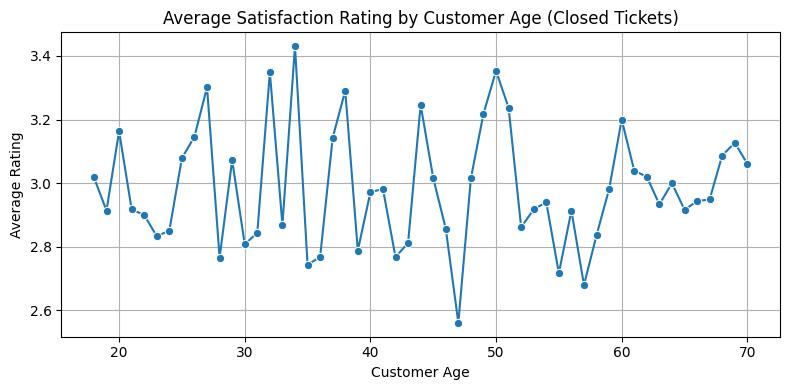

In [10]:
# Filtered closed tickets
import matplotlib.pyplot as plt
import seaborn as sns
closed_tickets = df[df['Ticket Status'] == 'Closed']

# Grouped by Customer Age and calculated average rating
avg_rating_by_age = closed_tickets.groupby('Customer Age')['Customer Satisfaction Rating'].mean().reset_index()

#  Plot
plt.figure(figsize=(8,4))
sns.lineplot(data=avg_rating_by_age, x='Customer Age', y='Customer Satisfaction Rating', marker='o')
plt.title('Average Satisfaction Rating by Customer Age (Closed Tickets)')
plt.xlabel('Customer Age')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

#**TICKET DISTRIBUTION ACCORDING TO STATUS**
#This pie chart shows how support tickets are divided into three groups: Pending Customer Response, Open, and Closed. Each colored slice (yellow, light blue, and red) shows the percentage of tickets in each group. It’s an easy way to see how many tickets still need replies, how many are in progress, and how many are done.



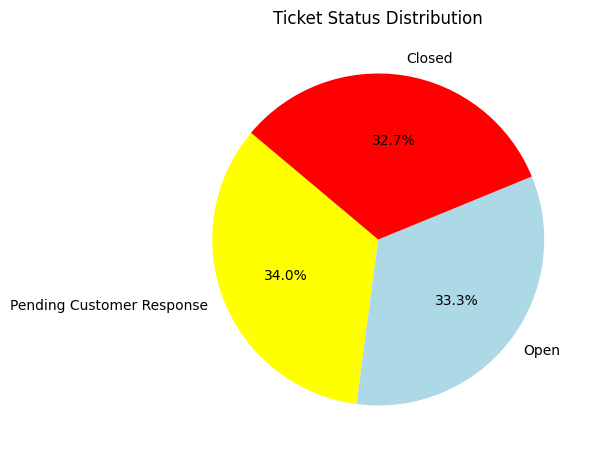

In [12]:
status = ['Pending Customer Response', 'Open', 'Closed']
counts = [2881, 2819, 2769]

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=status, autopct='%1.1f%%', startangle=140, colors=['yellow', 'lightblue', 'red'])
plt.title('Ticket Status Distribution')
plt.tight_layout()
plt.show()

#**Ticket Type Distribution**
#This bar chart displays the number of tickets for each type, such as Refund Request, Technical Issue, Cancellation Request, Product Inquiry, and Billing Inquiry. The height of each gold bar shows how many tickets fall under that category, making it easy to spot the most common customer concerns.

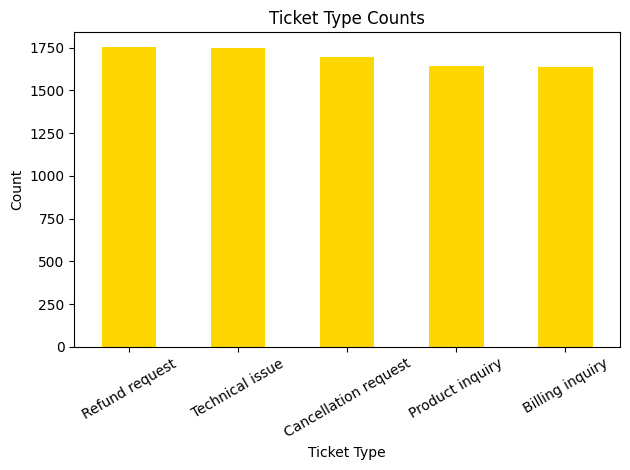

In [21]:
df['Ticket Type'].value_counts().plot(kind='bar', color='gold')


plt.title('Ticket Type Counts')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#**Ticket Priority Bar Chart**
#This chart shows how many tickets fall under each priority** Critical, High, Medium, and Low. The taller the light blue bar, the more tickets there are in that group. It helps us quickly see which issues need the most urgent attention.

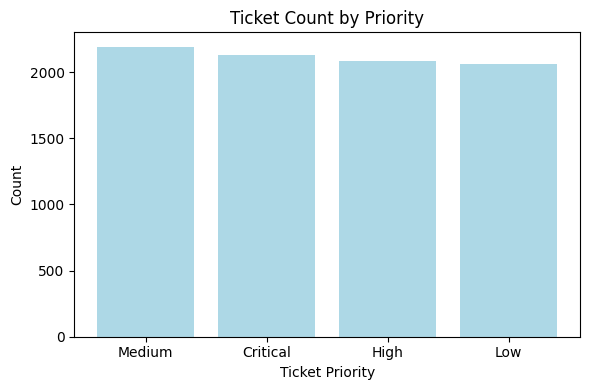

In [18]:
priorities = ['Medium', 'Critical', 'High', 'Low']
counts = [2192, 2129, 2085, 2063]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(priorities, counts,color='lightblue')
plt.xlabel('Ticket Priority')
plt.ylabel('Count')
plt.title('Ticket Count by Priority')
plt.tight_layout()
plt.show()

#**Ticket Distribution by Communication Channel**
#This bar chart shows how many tickets were received through different channels such as Email, Phone, Social media, and Chat.

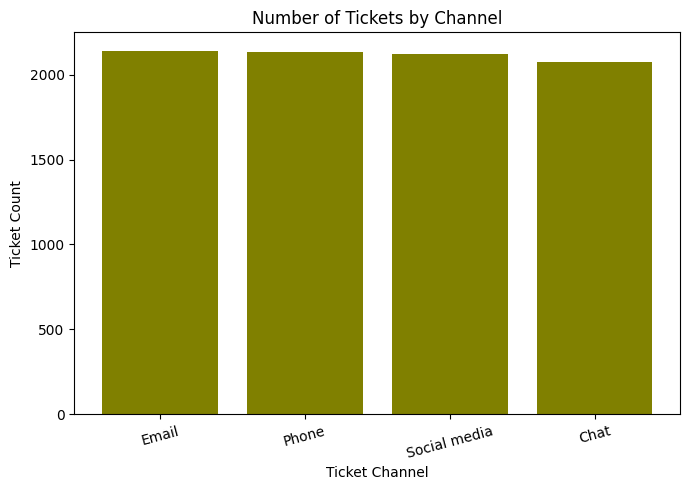

In [23]:
channels = ['Email', 'Phone', 'Social media', 'Chat']
counts = [2143, 2132, 2121, 2073]

# Plot
plt.figure(figsize=(7, 5))
plt.bar(channels, counts, color='olive')
plt.xlabel('Ticket Channel')
plt.ylabel('Ticket Count')
plt.title('Number of Tickets by Channel')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#**Distribution of Customer Complaints by Gender and Age Group**
#This bar chart shows how many customer issues came from different age groups and how these are split by gender. Age groups include under 18, 18–30, 30–45, 45–60, and 60+.

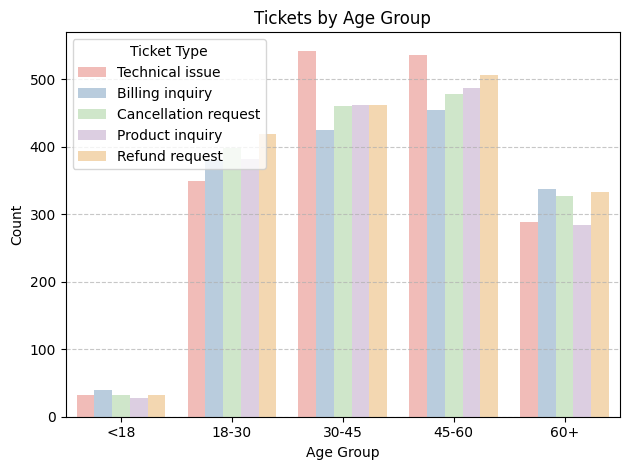

In [26]:
# Categorize age into groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=[0, 18, 30, 45, 60, 100],
                         labels=['<18', '18-30', '30-45', '45-60', '60+'])

# Plot ticket types by age group
sns.countplot(x='Age Group', hue='Ticket Type', data=df, palette='Pastel1')
plt.title('Tickets by Age Group')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#**Status Breakdown by Ticket Type**
#From the chart, we can observe:
1. All issue types have a significant number of Pending and Open tickets,
indicating many are still unresolved.
2. Refund requests and Technical issues have the highest total ticket counts.
3. Closed tickets are relatively lower compared to Open and Pending, suggesting a backlog in resolution.



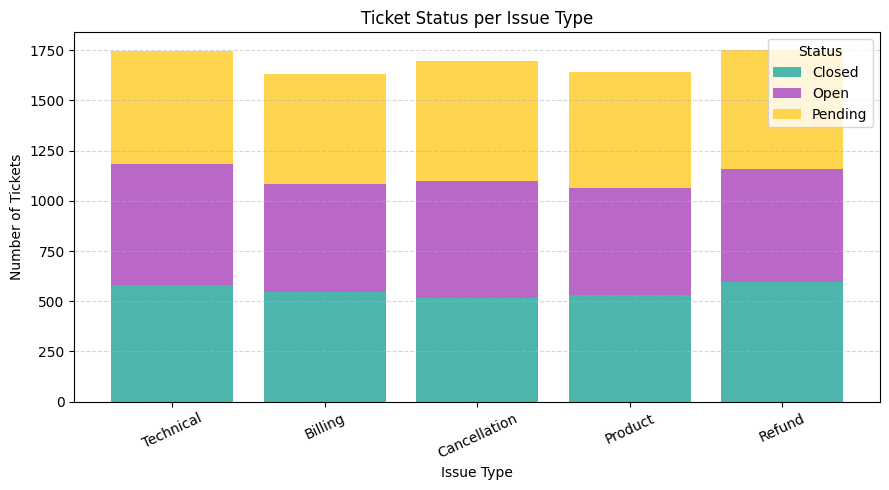

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Data
types = ['Technical', 'Billing', 'Cancellation', 'Product', 'Refund']
closed = np.array([580, 544, 516, 533, 596])
open_ = np.array([602, 539, 582, 532, 564])
pending = np.array([565, 551, 597, 576, 592])

# Plot
plt.figure(figsize=(9, 5))
plt.bar(types, closed, label='Closed', color='#4DB6AC')
plt.bar(types, open_, bottom=closed, label='Open', color='#BA68C8')
plt.bar(types, pending, bottom=closed+open_, label='Pending', color='#FFD54F')

plt.title('Ticket Status per Issue Type')
plt.xlabel('Issue Type')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=25)
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#**Ticket Resolution and Urgency Overview by Category**

In [30]:
summary = df.groupby(['Ticket Type', 'Ticket Priority', 'Ticket Status']).size().unstack(fill_value=0)
print(summary)


Ticket Status                         Closed  Open  Pending Customer Response
Ticket Type          Ticket Priority                                         
Billing inquiry      Critical            143   137                        140
                     High                135   134                        113
                     Low                 133   137                        128
                     Medium              133   131                        170
Cancellation request Critical            145   134                        144
                     High                124   151                        123
                     Low                 105   143                        166
                     Medium              142   154                        164
Product inquiry      Critical            144   122                        137
                     High                131   131                        137
                     Low                 118   134              

#**Missing Data Summary in the Dataset**

In [32]:
# Checking missing values count and percentage
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# Combining into one DataFrame for clear view
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})

# Filtering only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

# Showing the result
print(missing_df)

                              Missing Count  Missing %
Resolution                             5700  67.304286
Time to Resolution                     5700  67.304286
Customer Satisfaction Rating           5700  67.304286
First Response Time                    2819  33.286102


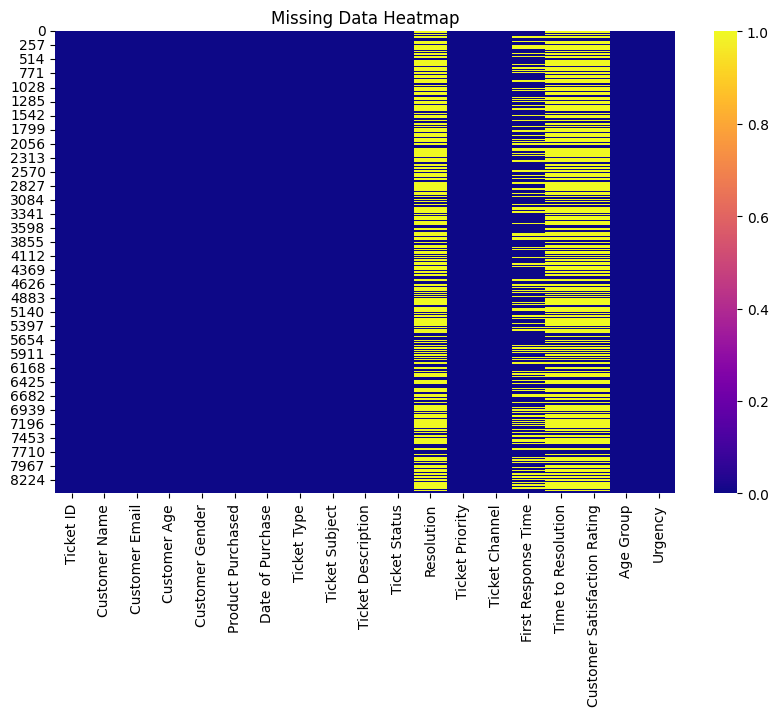

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='plasma' )
plt.title('Missing Data Heatmap')
plt.show()



#**Text Cleaning and Preprocessing**


In [53]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
import nltk
import re
from collections import Counter # Import Counter here

# Ensure stopwords are downloaded before calling stopwords.words()
# Although downloaded earlier, explicitly ensuring it here can prevent issues
nltk.download('stopwords', quiet=True) # Added quiet=True to avoid repeated output if already downloaded

tokenizer = TreebankWordTokenizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = tokenizer.tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Cleaned_Description'] = df['Ticket Description'].apply(clean_text)

# Getting most common words
all_words = ' '.join(df['Cleaned_Description']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))

[('productpurchased', 14048), ('issue', 11530), ('im', 10287), ('please', 8808), ('assist', 6250), ('ive', 6001), ('problem', 2285), ('product', 2270), ('data', 1654), ('software', 1552), ('account', 1461), ('steps', 1390), ('noticed', 1208), ('persists', 1178), ('help', 1176), ('resolve', 1165), ('update', 1155), ('would', 1122), ('device', 1106), ('unable', 1088)]


In [54]:
all_words = ' '.join(df['Cleaned_Description']).split()

# Getting most common words
word_freq = Counter(all_words)
print(word_freq.most_common(20))

[('productpurchased', 14048), ('issue', 11530), ('im', 10287), ('please', 8808), ('assist', 6250), ('ive', 6001), ('problem', 2285), ('product', 2270), ('data', 1654), ('software', 1552), ('account', 1461), ('steps', 1390), ('noticed', 1208), ('persists', 1178), ('help', 1176), ('resolve', 1165), ('update', 1155), ('would', 1122), ('device', 1106), ('unable', 1088)]


#**Word Cloud of Cleaned Ticket Descriptions**

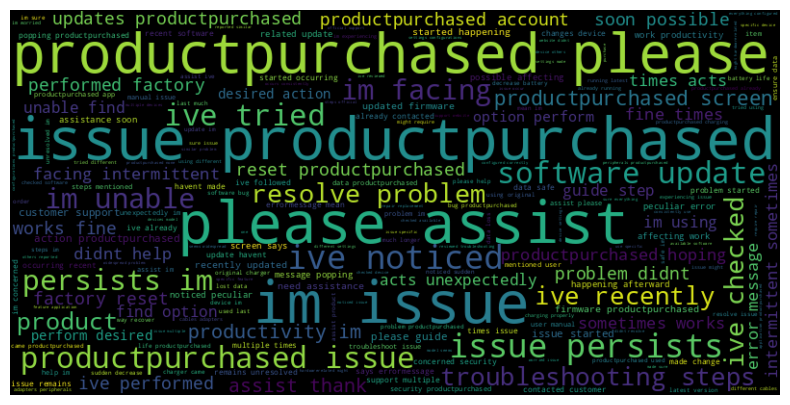

In [56]:
from wordcloud import WordCloud # Import WordCloud class

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['Cleaned_Description']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#**Calculating Response Delay and Resolution Time in Hours**

In [58]:
# Convert date/time columns to datetime objects
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

# Calculate Response Delay and Resolution Time in Hours
df['Response Delay (in hours)'] = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 3600
df['Resolution Time (in hours)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

In [60]:
resolved_tickets = df[(df['Ticket Status'] == 'Closed') & (df['Resolution Time (in hours)'] > 0)]

# Count the frequency of each Ticket Type
resolved_type_counts = resolved_tickets['Ticket Type'].value_counts()

# Display
print("Resolved Ticket Type Frequency:")
print(resolved_type_counts)

Resolved Ticket Type Frequency:
Ticket Type
Technical issue         305
Refund request          303
Billing inquiry         273
Cancellation request    265
Product inquiry         256
Name: count, dtype: int64


In [63]:
unresolved_pending_customer = df[
    (df['Ticket Status'] == False) &
    (df['Time to Resolution'].isna()) &
    (df['First Response Time'].notna())
]

# Now excluding them to focus on active unresolved tickets
active_unresolved = df[
    (df['Ticket Status'] == False) &
    (~df.index.isin(unresolved_pending_customer.index))
]

# Counting Ticket Types
unresolved_type_counts = active_unresolved['Ticket Type'].value_counts()

# Displaying
print("\nUnresolved Ticket Type Frequency (excluding pending customer reply):")
print(unresolved_type_counts)


Unresolved Ticket Type Frequency (excluding pending customer reply):
Series([], Name: count, dtype: int64)


In [65]:
# Checking how many days customer has not responded after support replied, to auto-close if >90 days

# Assuming today's date for reference
today = pd.to_datetime("today")

# Calculating how long customer hasn't responded (only if resolution is NaT)
df['Customer_Response_Pending_Days'] = df.apply(
    lambda row: (today - row['First Response Time']).days if pd.isna(row['Time to Resolution']) else 0,
    axis=1
)

# Marking tickets for auto-closing if no customer response in 90+ days
df['Auto_Close'] = df['Customer_Response_Pending_Days'].apply(lambda x: True if x > 90 else False)
# Getting all tickets where customer didn't respond for over 90 days

auto_close_tickets = df[df['Auto_Close'] == True]
# Removing tickets with negative resolution time

df_filtered = df[df['Resolution Time (in hours)'] >= 0]

In [66]:
# Counting  tickets to be auto-closed

print("Tickets to auto-close:", auto_close_tickets.shape[0])
# Exporting auto-closable tickets to CSV

auto_close_tickets.to_csv("auto_close_tickets.csv", index=False)
df.shape

Tickets to auto-close: 2881


(8469, 24)

In [68]:
closed_positive_res_time = df[(df['Time to Resolution'].notna()) & (df['Resolution Time (in hours)'] > 0)]
print("Number of closed tickets with positive resolution time:", closed_positive_res_time.shape[0])
# Filtering the dataframe where Ticket Status is 'Open'
open_tickets_df = df[df['Ticket Status'] == 'Open']

# Saved this filtered data to CSV
open_tickets_df.to_csv('open_tickets.csv', index=False)

print(f"Saved {len(open_tickets_df)} rows where Ticket Status is 'Open' to open_tickets.csv")
#Saving the data of resolved ticket to a new CSV

resolved_tickets = df[df['Ticket Status'] == True]
resolved_tickets.to_csv('resolved_tickets.csv', index=False)
print(f"Saved {resolved_tickets.shape[0]} resolved tickets to 'resolved_tickets.csv'")

Number of closed tickets with positive resolution time: 1402
Saved 2819 rows where Ticket Status is 'Open' to open_tickets.csv
Saved 0 resolved tickets to 'resolved_tickets.csv'
